In [23]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
import math

In [24]:
# -- Transition functions 
def relu(x):
    return (x > 0) * x


def relu_derivative(output):
    return output > 0


def tanh(x):
    return (np.e ** (x) - np.e ** (-x)) / (np.e ** (x) + np.e ** (-x))


def tanh_derivative(x):
    return 1 - tanh(x)

def lrelu(x):
    x = np.where(x > 0, x, x * 0.001)
    return x

def lrelu_derivative(x):
    dx = np.ones_like(x)
    dx[x < 0] = 0.001
    return dx

In [25]:
# choose Transition function
transition_func = tanh
transition_func_derivative =tanh_derivative


In [26]:
# -- Data

# coos (1) or (2) or generate yor own data 
np.random.seed(seed=1)

# (1)
# n = 200
# x = np.array(np.array([(1, i + np.random.normal(loc=4, scale=6)) for i in range(0, n)]))
# y = np.array([np.array([i + np.random.normal(loc=0, scale=2, )]) for i in range(0, n)])
# y = (y - y.mean()) ** 2

# (2)
x = np.arange(0,3*np.pi,0.1)   # start,stop,step
y = np.sin(x).reshape(len(x),1)
x = np.array(np.array([(1, i + np.random.normal(loc=0, scale=0.2))for i in x]))


In [27]:
# -- Normalization
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
y = (y - y.mean()) / y.std()

In [28]:
# -- Scaling 
x[:, 1] = (x[:, 1] + abs(x[:, 1].min()))
x[:, 1] = x[:, 1] / x[:, 1].max()

In [29]:
# -- Params 
# Step size  
alpha = 0.01

# Number of iterations 
iters = 100000

# Number of nuerons 
hidden_size = 20

In [30]:
# -- Weights initiation 
# Final_Weights 
mu = y.mean()

w2 = np.array([np.random.normal(loc=mu, scale=0.5) for i in range(0, hidden_size)]).reshape(hidden_size, 1)

# First_hidden_weigts
w1 = np.array(np.array([[np.random.normal(loc=mu, scale=0.5)] * hidden_size for i in range(0, x.shape[1])]))


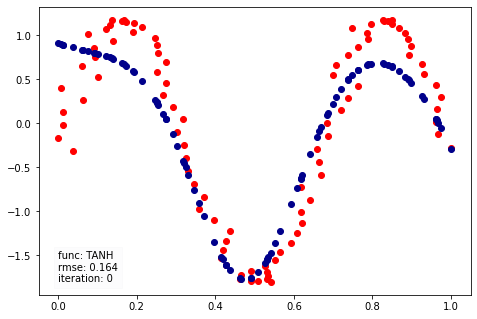

In [32]:


# -- iterate and plot predicted vs actual each 300 iterations
for iteration in range(10):
    for i in range(len(x)):
        # batch
        layer_0 = x[i:i + 1]

        # - Forward -
        y_hat = transition_func(layer_0 @ w1) @ w2

        # - Backward -
        # Predicted vs actual
        diff = y_hat - y[i:i + 1]

        # w2 gradient 
        w2_grad = diff @ transition_func(layer_0 @ w1)

        # w1 gradient 
        w1_grad = (diff @ w2.T * transition_func_derivative(layer_0 @ w1)).T @ layer_0

        # update weights        
        w2 -= alpha * w2_grad.T
        w1 -= alpha * w1_grad.T

    if iteration % 50 == 0:
        y_pred = transition_func(x @ w1) @ w2
        n = len(x)
        e = sum((y_pred - y) ** 2 / n)[0]

        clear_output(wait=True)
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        ax.scatter(x=x[:, 1], y=y, color='r')
        ax.scatter(x[:, 1], y_pred, color='darkblue')
        ax.text(x.min(),y.min(), f'func: TANH\nrmse: {e:.3}\niteration: {iteration} ',bbox=dict(facecolor='darkblue', alpha=0.01))
            
        plt.show()
            



In [33]:
# Lets try it with RELU
transition_func = relu
transition_func_derivative =relu_derivative


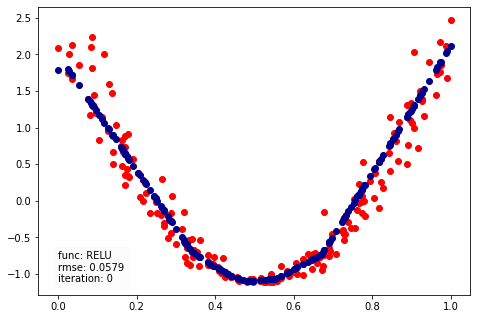

In [35]:

# -- Data

# coos (1) or (2) or generate yor own data 
np.random.seed(seed=1)

# (1)
n = 200
x = np.array(np.array([(1, i + np.random.normal(loc=4, scale=6)) for i in range(0, n)]))
y = np.array([np.array([i + np.random.normal(loc=0, scale=2, )]) for i in range(0, n)])
y = (y - y.mean()) ** 2

# (2)
# x = np.arange(0,3*np.pi,0.1)   # start,stop,step
# y = np.sin(x).reshape(len(x),1)
# x = np.array(np.array([(1, i + np.random.normal(loc=0, scale=0.2))for i in x]))

# -- Normalization
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
y = (y - y.mean()) / y.std()

# -- Scaling 
x[:, 1] = (x[:, 1] + abs(x[:, 1].min()))
x[:, 1] = x[:, 1] / x[:, 1].max()

# -- Params 
# Step size  
alpha = 0.001

# Number of iterations 
iters = 100000

# Number of nuerons 
hidden_size = 20


# -- Weights initiation 
# Final_Weights 
mu = y.mean()

w2 = np.array([np.random.normal(loc=mu, scale=0.5) for i in range(0, hidden_size)]).reshape(hidden_size, 1)

# First_hidden_weigts
w1 = np.array(np.array([[np.random.normal(loc=mu, scale=0.5)] * hidden_size for i in range(0, x.shape[1])]))


# -- iterate and plot predicted vs actual each 300 iterations
for iteration in range(iters):
    for i in range(len(x)):
        # batch
        layer_0 = x[i:i + 1]

        # - Forward -
        y_hat = transition_func(layer_0 @ w1) @ w2

        # - Backward -
        # Predicted vs actual
        diff = y_hat - y[i:i + 1]

        # w2 gradient 
        w2_grad = diff @ transition_func(layer_0 @ w1)

        # w1 gradient 
        w1_grad = (diff @ w2.T * transition_func_derivative(layer_0 @ w1)).T @ layer_0

        # update weights        
        w2 -= alpha * w2_grad.T
        w1 -= alpha * w1_grad.T

    if iteration % 50 == 0:
        y_pred = transition_func(x @ w1) @ w2
        n = len(x)
        e = sum((y_pred - y) ** 2 / n)[0]

        clear_output(wait=True)
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        ax.scatter(x=x[:, 1], y=y, color='r')
        ax.scatter(x[:, 1], y_pred, color='darkblue')
        ax.text(x.min(),y.min(), f'func: RELU\nrmse: {e:.3}\niteration: {iteration} ',bbox=dict(facecolor='darkblue', alpha=0.01))
            
        plt.show()
            


